In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow import keras
from tensorflow.keras import layers
from keras import models, layers
import tqdm
from PIL import Image

import os
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import confusion_matrix
from keras.applications import Xception
from keras.applications import VGG19
from keras.applications import ResNet50
from keras.applications import InceptionResNetV2

from keras.applications import MobileNet
from keras.callbacks import EarlyStopping
from keras.layers import Dense, GlobalAveragePooling2D

from keras.models import Model

%matplotlib inline

In [ ]:
PATH = "/kaggle/input/challenges-in-representation-learning-facial-expression-recognition-challenge"
data = pd.read_csv(os.path.join(PATH, "icml_face_data.csv"))
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

In [ ]:
print(data)

In [ ]:
input_shape = (71,71,1)
batch_size = 32
target_size = (71,71)

In [ ]:
# Function to parse data into right format
# Output: Image in right shaped and normalized + labels
def parse_data(data):
    image_array = np.zeros(shape=(len(data), 48, 48, 1))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, ' pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48, 1))
        image_array[i] = image
        
    return image_array, image_label

# Splitting the data into train, validation and testing set thanks to Usage column
train_imgs, train_lbls = parse_data(data[data[" Usage"] == "Training"])
val_imgs, val_lbls = parse_data(data[data[" Usage"] == "PrivateTest"])
test_imgs, test_lbls = parse_data(data[data[" Usage"] == "PublicTest"])

In [ ]:
model_xception = Xception(weights=None, include_top=False, input_shape=input_shape)
model_vgg19 = VGG19(weights=None, include_top=False, input_shape=input_shape)
model_resnet = ResNet50(weights=None, include_top=False, input_shape=input_shape)
model_mobilenet = MobileNet(weights=None, include_top=False, input_shape=input_shape)
model_xception.trainable = False
model_vgg19.trainable = False
model_resnet.trainable = False
model_mobilenet.trainable = False
model_vgg19.summary()

In [ ]:
print("train shape", np.shape(train_imgs))
print("validation shape", np.shape(val_imgs))
print("validatio shape", np.shape(val_imgs))

In [ ]:
# print(train_imgs)

In [ ]:
# import os, shutil 
# os.mkdir("/kaggle/working/imgs")
# data = np.array(train_imgs[:5])
# i = 0
# for px_map in data:
#     i = i + 1
#     px_map = np.reshape(px_map, (48, 48))
#     image = Image.fromarray(px_map)
#     image = image.convert('RGB')
#     image.save('/kaggle/working/imgs/'+str(i)+'.bmp')

In [ ]:
flat1 = model_vgg19.layers[-1].output
flat1 = GlobalAveragePooling2D()(flat1)
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
# class1 = layers.Dense(256, activation='relu')(class1)
class1 = layers.Dense(128, activation='relu')(class1)
# class1 = layers.Dense(64, activation='relu')(class1)
output = layers.Dense(7, activation='softmax')(class1)
# define new model
model = Model(inputs=model_vgg19.inputs, outputs=output)
# summarize
model.summary()

In [ ]:
import tensorflow_addons as tfa

opt = tfa.optimizers.RectifiedAdam(
                 lr=0.00001,
                 total_steps=10000,
                 warmup_proportion=0.1,
                 min_lr=1e-5)
ranger = tfa.optimizers.Lookahead(opt, sync_period=6, slow_step_size=0.5)

model.compile(
  loss = "binary_crossentropy",
  optimizer=ranger,
  metrics = ["acc"]
)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
# Training the model, and validating
history = model.fit(train_imgs, train_lbls, 
          epochs=100, batch_size=128, 
          validation_data=(val_imgs, val_lbls), verbose=1, callbacks=[es])

In [ ]:
#Train accuracy and validation accuracy vs epoch graph
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
test_prob = model.predict(test_imgs)
test_pred = np.argmax(test_prob, axis=1)
test_accuracy = np.mean(test_pred == test_lbls)

print(test_accuracy)

conf_mat = confusion_matrix(test_lbls, test_pred)

pd.DataFrame(conf_mat, columns=emotions.values(), index=emotions.values())

class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(128, activation='relu')(class1)
output = layers.Dense(7, activation='softmax')(class1), optimizers.RectifiedAdam(lr=0.00001, total_steps=10000, warmup_proportion=0.1, min_lr=1e-5), epochs=10, batch_size=128 <br>
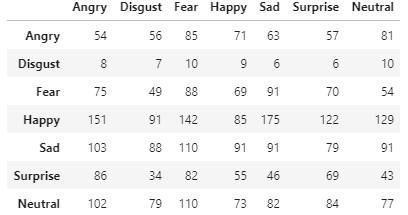 <br>
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(128, activation='relu')(class1)
output = layers.Dense(7, activation='softmax')(class1), optimizers.RectifiedAdam(lr=0.00001, total_steps=100, warmup_proportion=0.1, min_lr=1e-5), epochs=10, batch_size=32 <br>
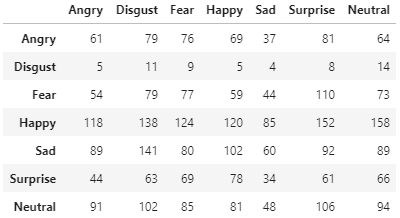 <br>
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(128, activation='relu')(class1)
output = layers.Dense(7, activation='softmax')(class1), optimizers.RectifiedAdam(lr=0.00001, total_steps=100, warmup_proportion=0.1, min_lr=1e-5), epochs=10, batch_size=512 <br>
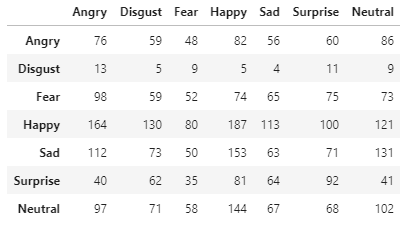 <br>
class1 = layers.Dense(1024, activation='relu')(flat1)
class1 = layers.Dense(512, activation='relu')(class1)
class1 = layers.Dense(128, activation='relu')(class1)
output = layers.Dense(7, activation='softmax')(class1), optimizers.RectifiedAdam(lr=0.00001, total_steps=100, warmup_proportion=0.1, min_lr=1e-5), epochs=100, batch_size=512 <br>
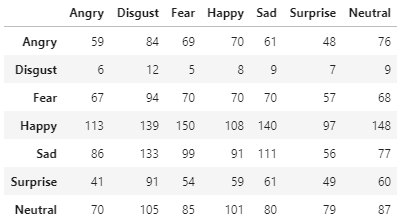<br>

Зміна кількості шарів впливає на кількість можливих пройдених епох, так чим більше ми використовуємо шарів Dense в даній нейронній мережі, тим менше епох опрацьовується; найбільш оптимальна кількість нейронів в шарах 1024 + 512 + 128, так значення точності йде не на спад, а навпаки, проте через обмеження в кількості шарів, опрацювати більше 10 епох не вийшло; зміна видів функцій активації: використовуючи sigmoid дані сильно збиваються і остаточі втрати дуже великі, що призводить до overfitting, оскільки в нас не бінарна кількість даних, також зміна параметру total_steps в оптимізаторі показала кращі результати при значенні 100, ніж 10000.<br>

1.Основна ідея переносу навчання.<br>
Використання попередньо навчених мереж для розв’язання нових задач. Н<br>
2. Яким чином навчати всі шари мережі, а не тільки Dense?<br>
Методом зворотного поширення помилки, але вимагає щонайменше одноразово безперервно диференційовних нелінійних функцій нейронів на всіх шарах нейромережі.